# Logistic Regression — Breast Cancer

**Goal:** Binary classification (malignant vs benign) using logistic regression.

**Dataset:** `sklearn.datasets.load_breast_cancer` (569 samples, 30 features).

**What you'll see**
- EDA & scaling
- Train/validation/test split
- Logistic Regression (regularized)
- ROC curve & AUC
- Precision/Recall & confusion matrix

*Last updated: August 11, 2025*


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix


Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load dataset
data = load_breast_cancer(as_frame=True)
df = data.frame.copy()
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Quick EDA

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [4]:
# Train/Val/Test split
X = df.drop(columns=['target'])
y = df['target']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval)

X_train.shape, X_val.shape, X_test.shape

((341, 30), (114, 30), (114, 30))

## Logistic Regression (with StandardScaler)

In [5]:
logit = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=500))
])

logit.fit(X_train, y_train)
proba_val = logit.predict_proba(X_val)[:, 1]

fpr, tpr, _ = roc_curve(y_val, proba_val)
roc_auc = auc(fpr, tpr)
print({"AUC": round(roc_auc, 3)})

{'AUC': 0.998}


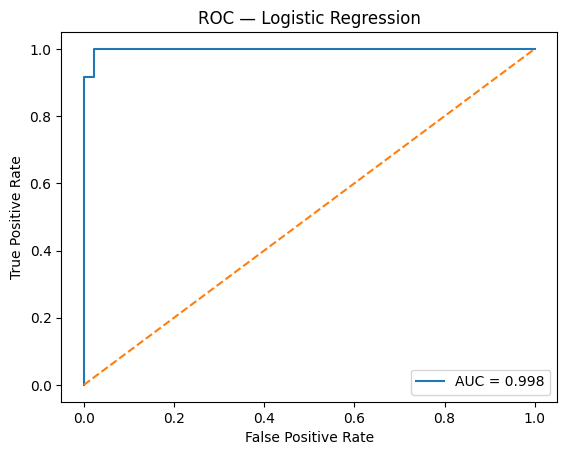

In [6]:
# ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC — Logistic Regression")
plt.legend()
plt.show()

## Thresholding, Confusion Matrix, and Classification Report

In [7]:
# Use default 0.5 threshold
pred_val = (proba_val >= 0.5).astype(int)

print(confusion_matrix(y_val, pred_val))
print(classification_report(y_val, pred_val, target_names=data.target_names))

[[42  1]
 [ 0 71]]
              precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        43
      benign       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



## Final Evaluation on Test Set

In [8]:
proba_test = logit.predict_proba(X_test)[:, 1]
pred_test = (proba_test >= 0.5).astype(int)

fpr_t, tpr_t, _ = roc_curve(y_test, proba_test)
roc_auc_t = auc(fpr_t, tpr_t)
print("Test AUC:", round(roc_auc_t, 3))
print(classification_report(y_test, pred_test, target_names=data.target_names))

Test AUC: 0.995
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

